Wine quality: <b>https://www.kaggle.com/datasets/yasserh/wine-quality-dataset</b>

In [36]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('../Datasets/wineQT.csv')
df=df.drop('Id', axis=1)



a few statistics:

In [37]:
# First few rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
# some mean values
print('fixed acidity mean:' ,df['fixed acidity'].mean())
print('volatile acidity mean: ',df['volatile acidity'].mean())
print('citric acid mean: ',df['citric acid'].mean())
print('pH mean: ',df['pH'].mean())

fixed acidity mean: 8.311111111111112
volatile acidity mean:  0.5313385826771653
citric acid mean:  0.2683639545056868
pH mean:  3.3110148731408575


Fixed acidity, volatile acidity and residual sugar can influence the pH levels. Let's train a Linear Regression model on it

In [39]:
# prediction target 
y_pH=df.pH
# validation data
X_pH=df[['fixed acidity','volatile acidity', 'residual sugar']]

# Train test split
X_train, X_test,y_train,y_test = train_test_split(X_pH,y_pH, test_size=0.2)

# Let's use Linear Regression
model = LinearRegression()

# Fit 
model.fit(X_train,y_train)

# Predicting
y_pred = model.predict(X_test)

# mean squared error
mse=np.sqrt(mean_squared_error(y_test,y_pred))

# mean absolute error
mae= mean_absolute_error(y_test,y_pred)

print('Mean Squared error: ',mse)
print('Mean Absolute error: ',mae)


Mean Squared error:  0.12159163422569307
Mean Absolute error:  0.08930971064255623


Decision Tree Classifier

In [40]:
# Decision tree classifier
clf=DecisionTreeClassifier()

# X takes all columns except the target one
X=df.drop('quality',axis=1)
# y -target column
y=df['quality']

# Fit the model on the whole dataset
clf.fit(X, y)

# Make predictions on the whole dataset
pred = clf.predict(X)

# Accuracy
accuracy = accuracy_score(y, pred)

# Mean squared error
mse = np.sqrt(mean_squared_error(y, pred))

# Mean absolute error
mae = mean_absolute_error(y, pred)

print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)
print('Accuracy: ', accuracy)
print('First 5 quality predictions:', pred[:5])

Mean Squared Error:  0.0
Mean Absolute Error:  0.0
Accuracy:  1.0
First 5 quality predictions: [5 5 5 6 5]


^^^ Perfect fit, not necessarily a good thing though.

In [41]:
# Predict the quality of the entire dataset using Decision Tree Classifier
wine_qt = [[7.2, 0.3, 0.3, 2.1, 0.065, 8, 18, 0.996, 3.2, 0.6, 9.5]]

# Predict the pH level using Linear Regression
wine_ph=[[7.5, 0.5, 0.2]]

phlevel=model.predict(wine_ph)
quality=clf.predict(wine_qt)

print("The predicted Quality using the Decision Tree Classifier is: ",quality)
print("The predicted PH using the Linear Regression model is: ",phlevel)

The predicted Quality using the Decision Tree Classifier is:  [5]
The predicted PH using the Linear Regression model is:  [3.35933173]


c:\Users\devix\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\devix\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Let's see a Correlation Matrix

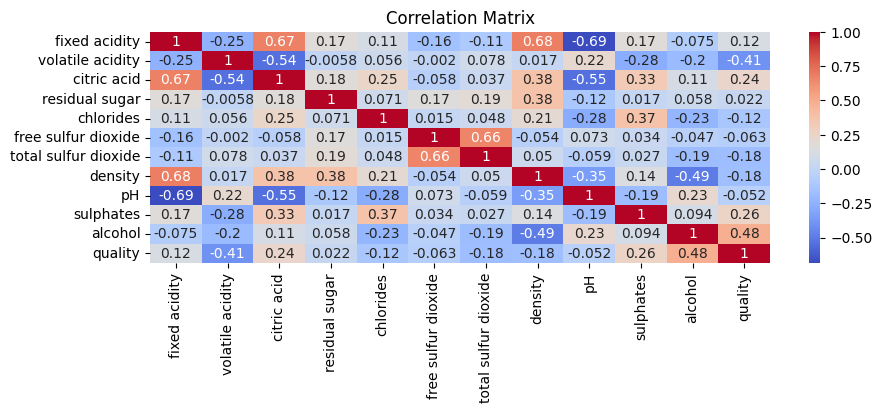

In [42]:
df_clean=df.dropna()
correlation_matrix=df_clean.corr()
# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Fixed acidity with density and citric acid <br>
Free sulfur dioxide with total sulfur dioxide <br>
Seem to have the strongest interactions